# Train and Calculate Error Rate

In [188]:
#download dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [189]:
#import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

In [205]:
#extract feature dataset and targets
X, y = mnist["data"], mnist["target"]
X.shape #784 feature represents color index from rgb 

(70000, 784)

In [206]:
#look at first feature of X
fotoArr = X[0:1]
fotoArr

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


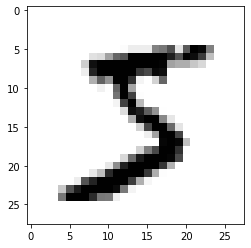

In [207]:
#reshape arr so it could be seen as photo
#reshape function is in numpy so first turn our dataframe into a numpy
fotoArrNumpy = fotoArr.to_numpy()
fotoImageArr = fotoArrNumpy.reshape(28,28)
#make it look like photo with plt
plt.imshow(fotoImageArr, cmap = mpl.cm.binary, interpolation="nearest")
plt.show()

In [208]:
#Check if y is correct
y[0]

'5'

In [209]:
#Preparation for Training (if x=5 y=1, else y=0)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
#Train Dataset
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) #you dont have to give these infos
sgd_classifier.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [211]:
#Predict
#we know X[0] is 5 and others from 7.th code block

sgd_classifier.predict(X[0:1]) , sgd_classifier.predict(X[59998 :59999 ]) ,sgd_classifier.predict(X[59997 :59998 ]) 

(array([ True]), array([False]), array([ True]))

In [212]:
#Calculate Error Rate 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#numpy.ravel = returns a flattened array

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()


In [213]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate

(0.8370879772350012, 0.9661007833927899)

# Train Again By Shifting Existing Datasets Pixels and Calculate Error Rate

In [214]:
X_train.shape

(60000, 784)

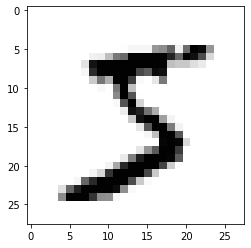

In [217]:
X_train = X_train.to_numpy()
X_train_0 = X_train[0:1].reshape((28, 28))
plt.imshow(X_train_0, interpolation="nearest", cmap="Greys") #normal


(28, 28)

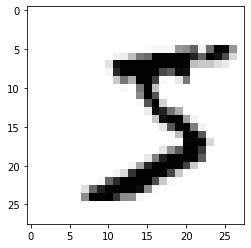

In [218]:
from scipy.ndimage.interpolation import shift

def shift_image(X_train, x_direction, y_direction):
    X_train_zero = X_train.reshape((28, 28)) #28 row 28 column a square matrix = picture
    shifted_image = shift(X_train_zero, [ y_direction, x_direction]) #shift image [y direcion, x direction]
    return shifted_image


shifted_image_x_dimention = shift_image(X_train[0], 3,0) #shifted 3 right in x direction
plt.imshow(shifted_image_x_dimention, interpolation="nearest", cmap="Greys")#show
shifted_image_x_dimention.shape

In [219]:
#Create new Dataset by shifting and saving them


X_train_augmented ,  y_train_augmented = [], []

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for x, y in zip(X_train, y_train_5):
        x = shift_image(x, dx, dy).reshape(784) 
        X_train_augmented.append(x)
        y_train_augmented.append(y)
        

In [220]:
#Convert list to numpy arrays

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [223]:
#Lets train 
X_train_augmented.shape, y_train_augmented.shape

((240000, 784), (240000,))

In [224]:

y_train_pred = cross_val_predict(sgd_classifier, X_train_augmented, y_train_augmented, cv=3)
tn, fp, fn, tp = confusion_matrix(y_train_augmented, y_train_pred).ravel()
tn, fp, fn, tp

(211910, 6406, 7011, 14673)

In [225]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate

(0.6960956402106362, 0.9679747488820168)